# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [95]:
#Import all the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics

from sklearn.model_selection import train_test_split

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [96]:
#Pregnancies - Number of times pregnant
#GlucosePlasma - glucose concentration a 2 hours in an oral glucose tolerance test
#BloodPressure - Diastolic blood pressure (mm Hg)
#SkinThickness - Triceps skin fold thickness (mm)
#Insulin - 2-Hour serum insulin (mu U/ml)
#BMI - Body mass index (weight in kg/(height in m)^2)
#DiabetesPedigreeFunction - Diabetes pedigree function
#Age - Age (years)
#OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [97]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [98]:
print(pima_df.dtypes)
print(pima_df.shape)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [99]:
import numpy as np
colarray = ['plas','pres','skin','test','mass']
for col in colarray:
    pima_df[col].replace(0, pima_df[col].median(), inplace=True)
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [100]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

0    500
1    268
Name: class, dtype: int64


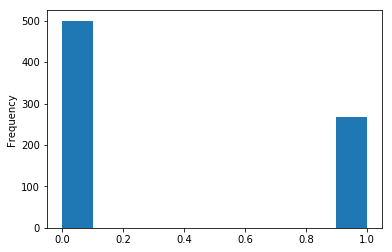

In [101]:
print(pima_df['class'].value_counts())
pima_df['class'].plot(kind='hist')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

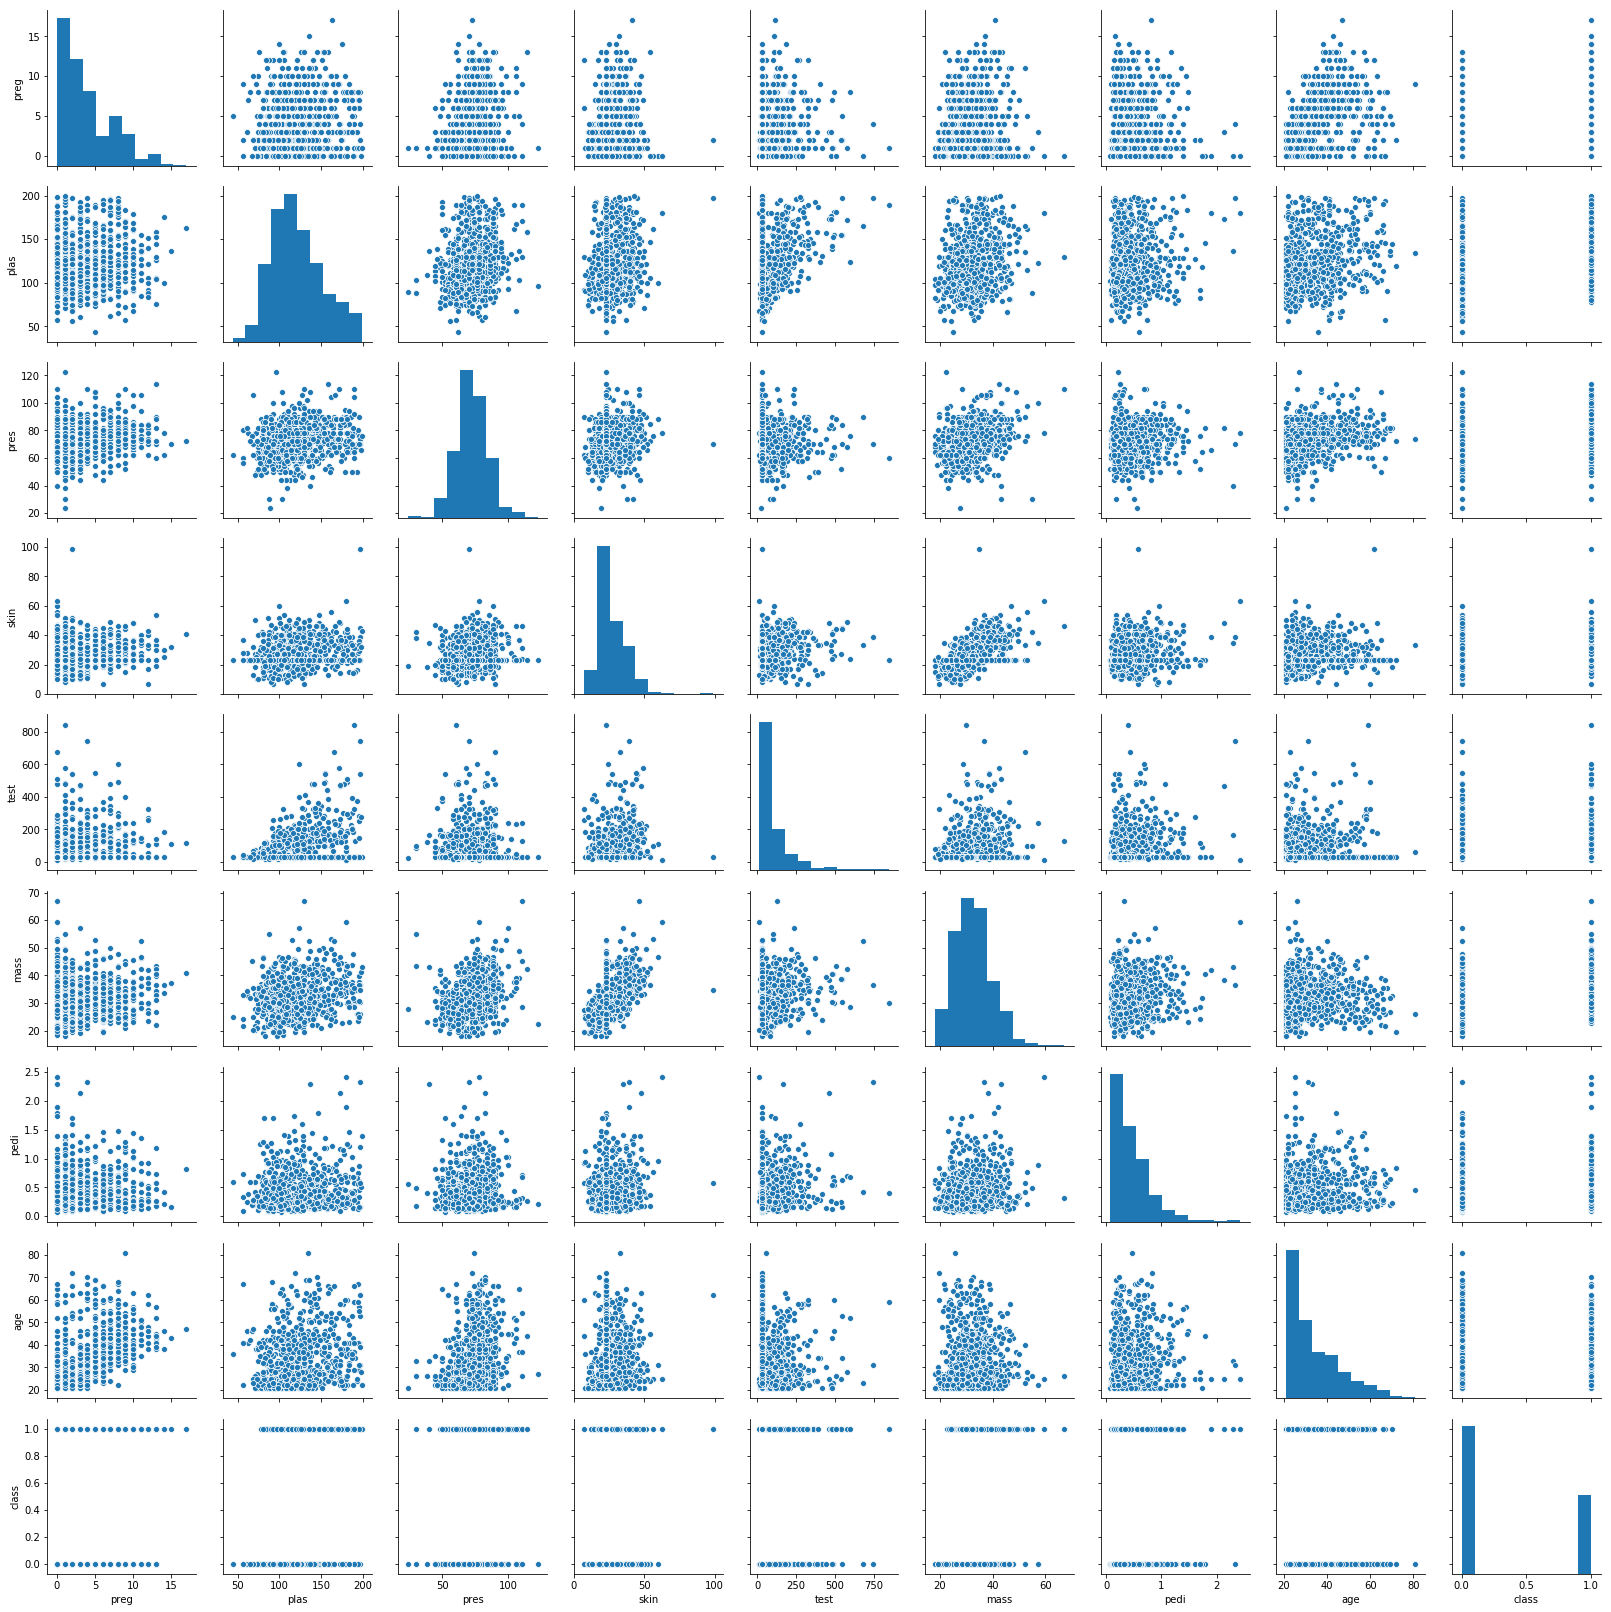

In [102]:

sns.pairplot(pima_df)

In [145]:
print(pima_df.corr())


           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.128213  0.208615  0.032568 -0.055697  0.021546 -0.033523   
plas   0.128213  1.000000  0.218937  0.172143  0.357573  0.231400  0.137327   
pres   0.208615  0.218937  1.000000  0.147809 -0.028721  0.281132 -0.002378   
skin   0.032568  0.172143  0.147809  1.000000  0.238188  0.546951  0.142977   
test  -0.055697  0.357573 -0.028721  0.238188  1.000000  0.189022  0.178029   
mass   0.021546  0.231400  0.281132  0.546951  0.189022  1.000000  0.153506   
pedi  -0.033523  0.137327 -0.002378  0.142977  0.178029  0.153506  1.000000   
age    0.544341  0.266909  0.324915  0.054514 -0.015413  0.025744  0.033561   
class  0.221898  0.492782  0.165723  0.189065  0.148457  0.312249  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.266909  0.492782  
pres   0.324915  0.165723  
skin   0.054514  0.189065  
test  -0.015413  0.148457  
mass   0.025744  0.312249  
pedi   0.0335

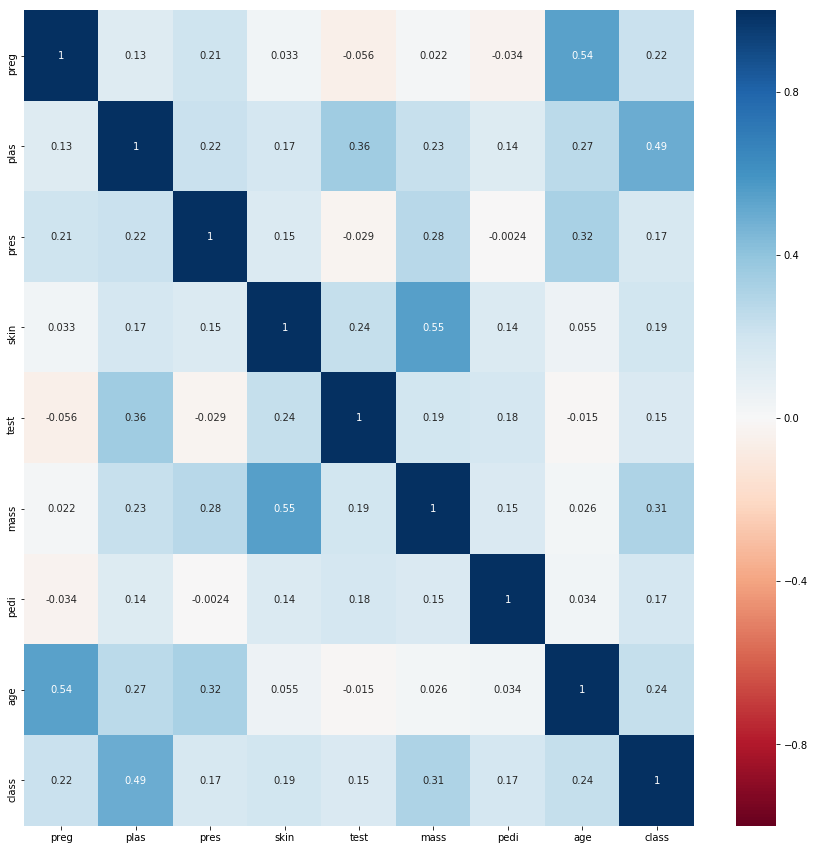

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(pima_df.corr(),annot=True, vmin=-1, vmax=1, cmap='RdBu')


By looking at above plots and correlation values, we see that correlation between the class and plassma, Age and pregnenacy, skin and mass. 

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [108]:
X = pima_df.drop("class", axis=1)
Y = pima_df[["class"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [130]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=4,random_state=7)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [131]:
print("Train set accuracy {0}".format(dt_model.score(X_train, y_train)))
print("Test set accuracy {0}".format(dt_model.score(X_test, y_test)))


y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

Train set accuracy 0.7951582867783985
Test set accuracy 0.7316017316017316
[[106  41]
 [ 21  63]]


Print the feature importance of the decision model - Optional

In [148]:
dt_model.feature_importances_

array([0.02817155, 0.5070506 , 0.00871599, 0.01689752, 0.        ,
       0.24134283, 0.05111347, 0.14670804])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=11)

rf_model.fit(X_train, y_train)
print("RandomForestClassifier model train accuracy {0}".format(rf_model.score(X_train, y_train)))
print("RandomForestClassifier model train accuracy {0}".format(rf_model.score(X_test, y_test)))

RandomForestClassifier model train accuracy 0.9851024208566108
RandomForestClassifier model train accuracy 0.7316017316017316


/Users/malarvizhi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/malarvizhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [139]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost_model = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10, random_state=11)
adaBoost_model.fit(X_train, y_train)
print("AdaBoostClassifier model train accuracy {0}".format(adaBoost_model.score(X_train, y_train)))
print("AdaBoostClassifier model train accuracy {0}".format(adaBoost_model.score(X_test, y_test)))


AdaBoostClassifier model train accuracy 0.9664804469273743
AdaBoostClassifier model train accuracy 0.6796536796536796


/Users/malarvizhi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [138]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(random_state=11)
bagging_model.fit(X_train, y_train)
print("Bagging model train accuracy {0}".format(bagging_model.score(X_train, y_train)))
print("Bagging model test accuracy {0}".format(bagging_model.score(X_test, y_test)))

Bagging model train accuracy 0.9832402234636871
Bagging model test accuracy 0.7359307359307359


/Users/malarvizhi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_model = GradientBoostingClassifier(n_estimators=50, learning_rate=.09, max_depth=5,random_state=11)
gradient_model.fit(X_train, y_train)
print("GradientBoostingClassifier model train accuracy {0}".format(gradient_model.score(X_train, y_train)))
print("GradientBoostingClassifier model test accuracy {0}".format(gradient_model.score(X_test, y_test)))

GradientBoostingClassifier model train accuracy 0.9813780260707635
GradientBoostingClassifier model test accuracy 0.7748917748917749


/Users/malarvizhi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.